### Approach to Keras:

1. Declare a Model
   1. Sequential: Sequence of Layers
   2. Functional: Multiple models with sequences of layers interconnected
2. Declare the Layers
   1. Embedding Layer, Dense Layers, Dropout Layers
   2. Tune the layers (Number of Neurons, act func, input_shape)
   3. Specify the output Layers
3. Compile the Model
   1. Optimizer (SGD, Adam)
   2. Loss Function (LogLoss/CrossEntropy, RMSE, MSE, MAE)
   3. Metrics for Evaluation (F1, Precision, Recall, Acc)
4. Fit the model
   1. X & Y
   2. Epochs
   3. Verbose = Log of the model run information

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical


In [5]:
data = pd.read_csv('/content/spam.csv', encoding = 'latin-1')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Separate the messages and the labels

In [7]:
data = data.iloc[:,:2]

In [8]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Extract message text and labels
messages = data["v2"].tolist()  # Assuming a "text" column for messages
labels = data["v1"].tolist()  # Assuming a "label" column for ham/spam (0 or 1)

Split data into train & test

In [10]:
x_train, x_test, y_train, y_test = train_test_split(messages, labels, test_size =0.2, random_state = 42)

In [11]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

4457
1115
4457
1115


CountVectorizer

In [12]:
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [13]:
# Convert labels to numerical values (0 for ham, 1 for spam)
y_train = [1 if labels == 'spam' else 0 for labels in y_train]
y_test = [1 if labels == 'spam' else 0 for labels in y_test]

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
x_train_vectorized.shape[1]

7735

In [16]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train_vectorized.shape[1],)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#model = Sequential()
#model.add(Dense(64, activation='relu', input_shape=(x_train_vectorized.shape[1],))) #Input Layer & HL1
#model.add(Dense(64, activation = 'relu')) #HL2
#model.add(Dense(64, activation = 'relu')) # HL3
#model.add(Dense(2, activation = 'softmax'))

In [24]:
##model = Sequential()
##model.add(Dense(64, activation='tanh', input_shape=(x_train_vectorized.shape[1],))) #Input Layer & HL1
##model.add(Dropout(0.3)) #Dropout to control overfitting
##model.add(Dense(64, activation = 'tanh')) #HL2
####model.add(Dropout(0.3)) #Dropout to control overfitting
##model.add(Dense(64, activation = 'tanh')) # HL3
##model.add(Dropout(0.3)) #Dropout to control overfitting
##model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
model = Sequential()
model.add(Dense(32, activation='tanh', kernel_regularizer = 'l1_l2', input_shape=(x_train_vectorized.shape[1],))) #Input Layer & HL1
model.add(Dropout(0.3)) #Dropout to control overfitting
model.add(Dense(16, activation = 'tanh')) #HL2
model.add(Dropout(0.3)) #Dropout to control overfitting
model.add(Dense(2, activation = 'sigmoid'))

In [31]:
model = Sequential()
model.add(Dense(32, activation='tanh', input_shape=(x_train_vectorized.shape[1],))) #Input Layer & HL1
model.add(Dropout(0.3)) #Dropout to control overfitting
model.add(Dense(16, activation = 'tanh')) #HL2
model.add(Dropout(0.3)) #Dropout to control overfitting
model.add(Dense(2, activation = 'sigmoid'))

In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 32)                  │         247,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 248,114 (969.20 KB)

 Trainable params: 248,114 (969.20 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [33]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Fit the Model

In [34]:
x_train_vectorized.sorted_indices()

<4457x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 58978 stored elements in Compressed Sparse Row format>

In [35]:
history = model.fit(x_train_vectorized.sorted_indices(), y_train, epochs = 10, batch_size = 32,validation_data = (x_test_vectorized, y_test))

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8574 - loss: 0.4483 - val_accuracy: 0.9803 - val_loss: 0.0893
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9920 - loss: 0.0585 - val_accuracy: 0.9839 - val_loss: 0.0632
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9962 - loss: 0.0231 - val_accuracy: 0.9830 - val_loss: 0.0649
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9982 - loss: 0.0114 - val_accuracy: 0.9821 - val_loss: 0.0751
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9996 - loss: 0.0055 - val_accuracy: 0.9812 - val_loss: 0.0836
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9830 - val_loss: 0.0879
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9803 - val_loss: 0.0940
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.

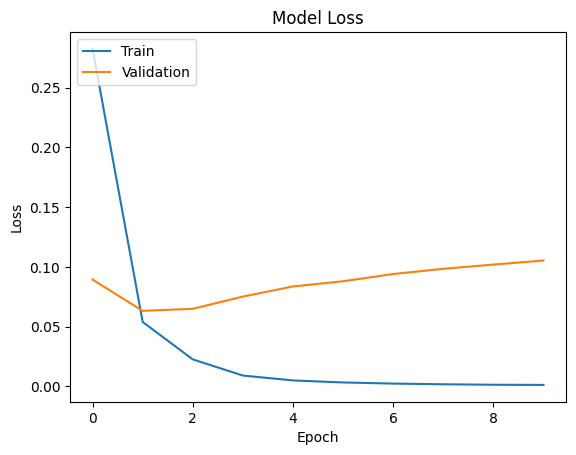

In [36]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
new_messages = "Buy these amazing stocks"
new_messages_vectorized = vectorizer.transform([new_messages])
predication = model.predict(new_messages_vectorized)[0][0]
if predication > 0.5:
  print("Spam")
else:
  print("Ham")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Spam
